## Install 

In [6]:
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.5.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp313-cp313-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp313-cp313-macosx_14_0_arm64.whl (23.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


## Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to preprocess the dataset

In [17]:
def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data['Hour'] = data['Timestamp'].dt.hour
    data['Minute'] = data['Timestamp'].dt.minute
    data['Second'] = data['Timestamp'].dt.second
    
    features = ['Voltage', 'Current', 'Energy', 'Frequency', 'PF', 'Hour', 'Minute', 'Second']
    target = 'Power'
    X = data[features]
    y = data[target]
    return X, y

In [18]:
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.plot(y_test.values, label='Actual', alpha=0.7)
    plt.plot(y_pred, label='Predicted', alpha=0.7)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Power')
    plt.legend()
    plt.grid()
    plt.show()

## Ingest data

In [23]:
idle_path = '../data/idle.csv'  # Path to idle data
test_paths = ['../data/high.csv', '../data/low.csv', '../data/variable.csv']  # Paths to test data

# Preprocess idle dataset
X_idle, y_idle = preprocess_data(idle_path)

# Normalize features
scaler = StandardScaler()
X_idle_scaled = scaler.fit_transform(X_idle)

X_train_idle, X_test_idle, y_train_idle, y_test_idle = train_test_split(X_idle_scaled, y_idle, test_size=0.2, random_state=42)


## Intialize model

In [24]:
models = {
    "SVR": SVR(kernel='rbf'),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

## Train models

In [25]:
# Train models on idle dataset
trained_models = {}
for name, model in models.items():
    model.fit(X_train_idle, y_train_idle)
    trained_models[name] = model

## Evaluate

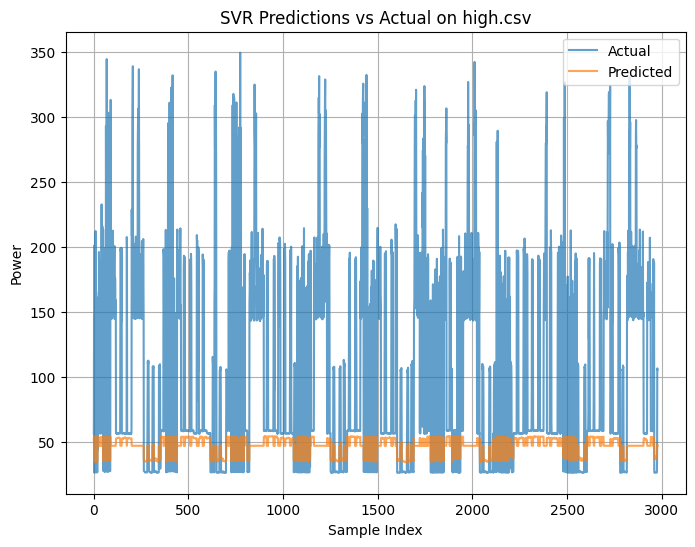

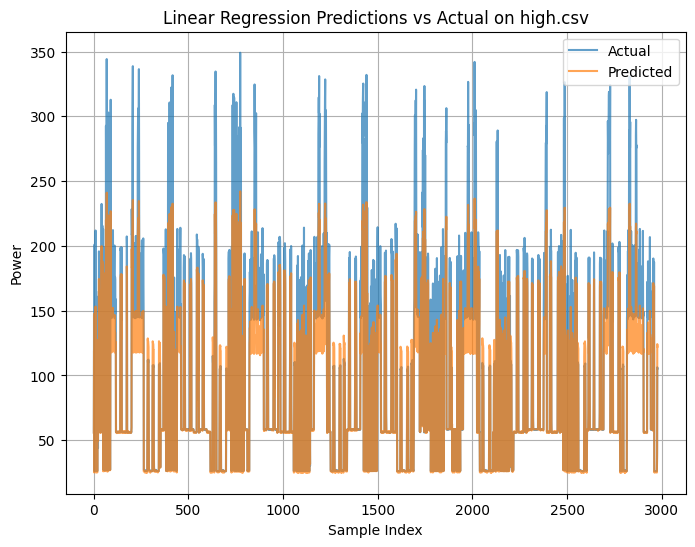

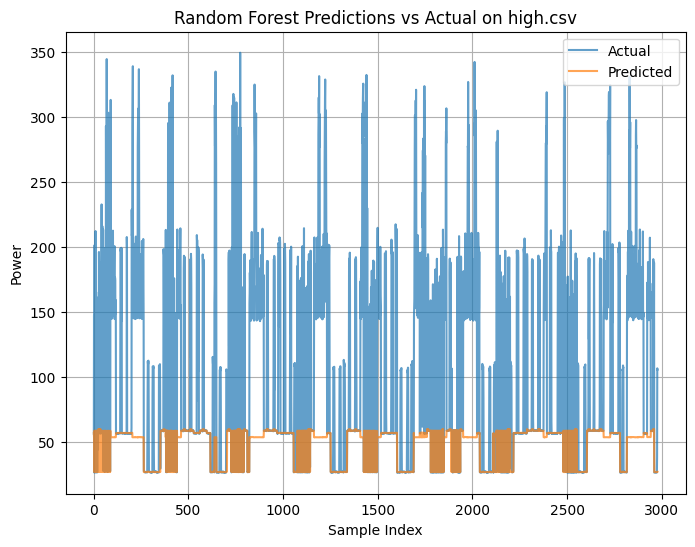

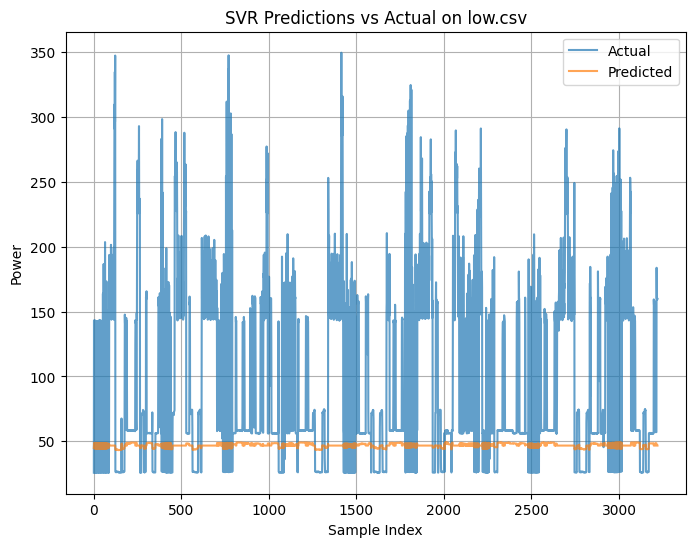

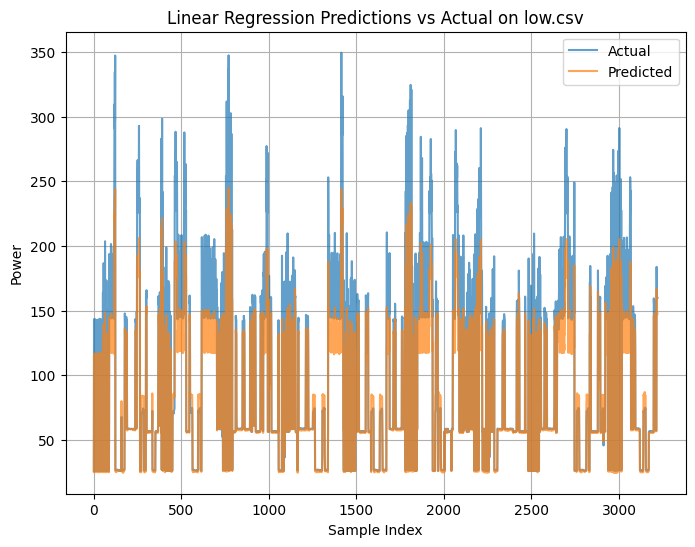

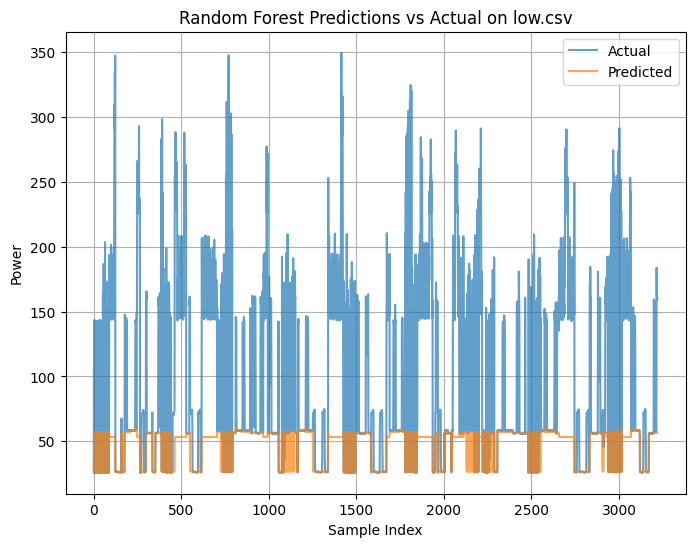

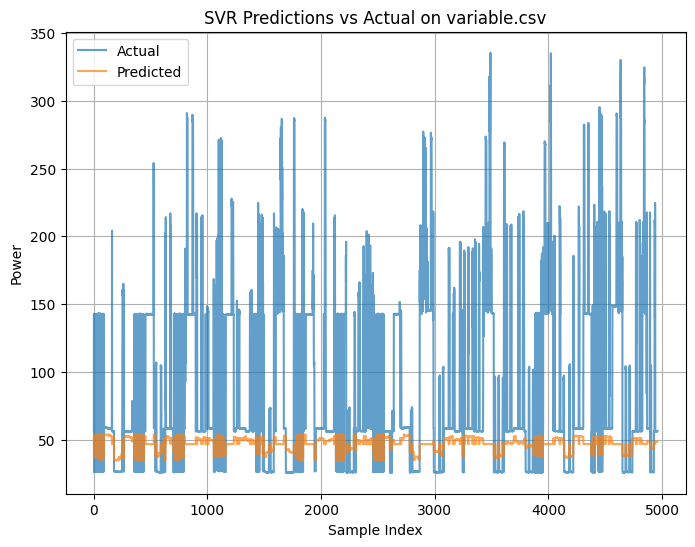

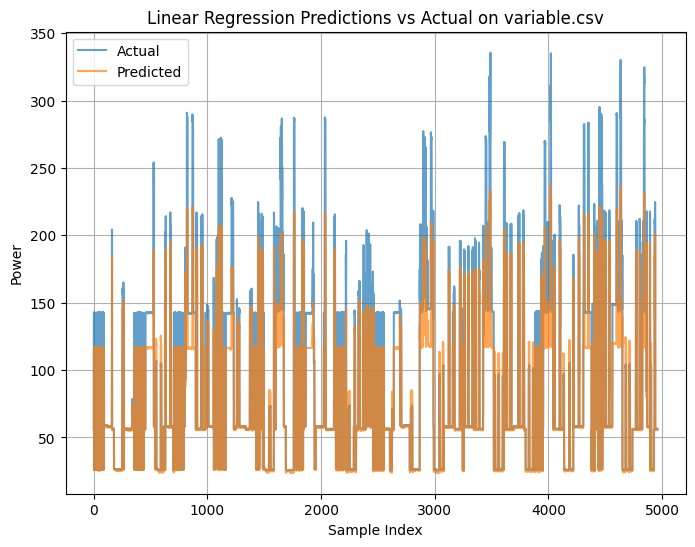

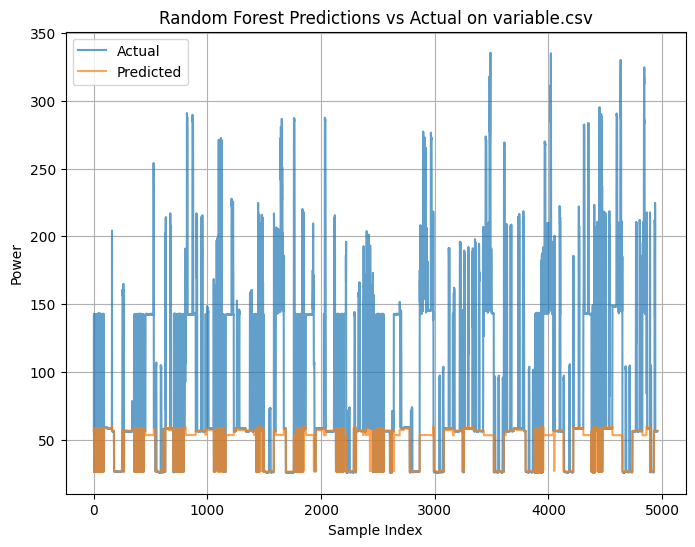

In [26]:
results = {}
for test_path in test_paths:
    X_test, y_test = preprocess_data(test_path)
    X_test_scaled = scaler.transform(X_test)
    
    dataset_name = test_path.split('/')[-1]  # Get dataset name from path
    results[dataset_name] = {}
    
    for name, model in trained_models.items():
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[dataset_name][name] = {"MSE": mse, "R2 Score": r2}
        
        # Plot predictions vs actual
        plot_title = f"{name} Predictions vs Actual on {dataset_name}"
        plot_results(y_test, y_pred, plot_title)

## results

In [27]:
print("\nComparison of Model Performance Across Datasets:")
for dataset, metrics in results.items():
    print(f"\nTesting on {dataset}:")
    for model_name, performance in metrics.items():
        print(f"{model_name}: MSE = {performance['MSE']:.4f}, R2 = {performance['R2 Score']:.4f}")



Comparison of Model Performance Across Datasets:

Testing on high.csv:
SVR: MSE = 8243.3159, R2 = -0.5022
Linear Regression: MSE = 660.3234, R2 = 0.8797
Random Forest: MSE = 7593.1803, R2 = -0.3837

Testing on low.csv:
SVR: MSE = 6687.5047, R2 = -0.5502
Linear Regression: MSE = 534.8313, R2 = 0.8760
Random Forest: MSE = 5998.0123, R2 = -0.3904

Testing on variable.csv:
SVR: MSE = 5388.7702, R2 = -0.4055
Linear Regression: MSE = 378.7048, R2 = 0.9012
Random Forest: MSE = 4842.0135, R2 = -0.2629
